## Load Some Images

In [1]:
from PIL import Image
import torch
from torchvision import transforms
import numpy as np
from glob import glob

In [2]:
image_files = glob('data/random/*')

images = [Image.open(f) for f in image_files]

## Load Pre-trained VGG11

In [3]:
import torchvision
import torchvision.models as models

In [4]:
vgg11 = torchvision.models.vgg11(pretrained=True, progress=True)
vgg11.to('cuda')

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [5]:
# it looks like the only interesting dropout layer above is classifier:2, so we want to agument on classifier:3

vgg11.classifier[2]

Dropout(p=0.5, inplace=False)

## Do Augmentation

In [6]:
import dropviz
import matplotlib.pyplot as plt

In [7]:
# turn of ticks because we are only plotting images
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False

In [8]:
#  https://pytorch.org/hub/pytorch_vision_alexnet/
  
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [9]:
# utilities for converting the normalized images into displayable ones

def denorm(image):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    image = image * std
    image = image + mean
    return image

def fix_image(image):
    if torch.is_tensor(image):
        image = image.numpy()
    image = image.reshape(3, 224, 224)
    image = image.transpose(1, 2, 0)
    image = denorm(image)
    return image

Epoch 1, loss 0.08748770505189896
Epoch 1001, loss 0.037707652896642685
Epoch 2001, loss 0.027953768149018288
Epoch 3001, loss 0.023084089159965515
Epoch 4001, loss 0.019795194268226624


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 0.017106587067246437


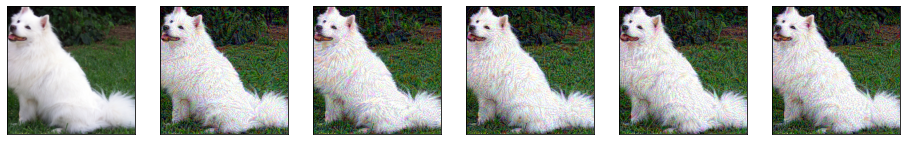

Epoch 1, loss 0.1684914380311966
Epoch 1001, loss 0.06275420635938644
Epoch 2001, loss 0.04615776613354683
Epoch 3001, loss 0.039884090423583984
Epoch 4001, loss 0.03410137817263603


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 0.029967626556754112


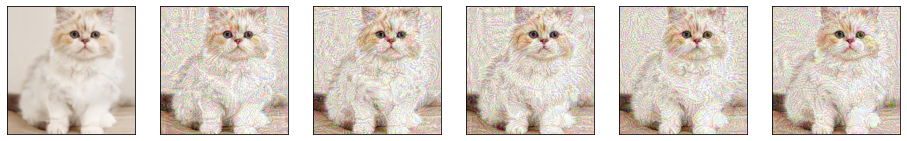

Epoch 1, loss 0.05947437509894371
Epoch 1001, loss 0.027067184448242188
Epoch 2001, loss 0.021578412503004074
Epoch 3001, loss 0.01896766945719719
Epoch 4001, loss 0.01632196642458439


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 0.014959707856178284


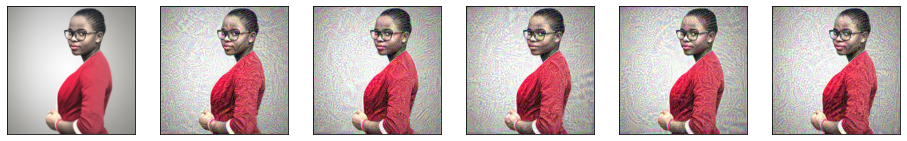

Epoch 1, loss 0.08188580721616745
Epoch 1001, loss 0.022789204493165016
Epoch 2001, loss 0.016197480261325836
Epoch 3001, loss 0.01262455340474844
Epoch 4001, loss 0.01096318382769823


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 0.009999307803809643


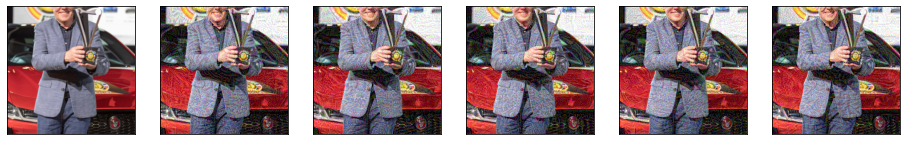

In [12]:
for image in images:
    
    # preprocess input
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)
    
    # augment
    corrupted_images, output = dropviz.augment(vgg11, vgg11.classifier[3], 'cuda', input_batch, 
                                               5, 5000, 0.01, 0.0001, verbosity=1)

    # plot
    fig, ax = plt.subplots(1, len(corrupted_images)+1, figsize=(16,20))

    ax[0].imshow(fix_image(input_batch))
    for n in range(len(corrupted_images)):
        ax[n+1].imshow(fix_image(corrupted_images[n]))
    plt.show()